In [1]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

array([[ 1.01525117, -0.50026831,  1.        ],
       [ 1.82667184,  0.26139265,  1.        ],
       [ 0.2155647 ,  1.18529436,  0.        ],
       ...,
       [ 0.06124409, -0.04896101,  1.        ],
       [ 1.53389671,  0.33173299,  1.        ],
       [ 1.59228251, -0.53860081,  1.        ]])

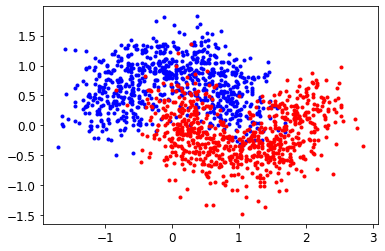

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

indecies_0 = np.where(y == 0)
indecies_1 = np.where(y == 1)

np.c_[X, y]
#X[:,0:1]
plt.plot(X[indecies_0][:,0:1], X[indecies_0][:,1:], 'b.')
plt.plot(X[indecies_1][:,0:1], X[indecies_1][:,1:], 'r.')

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
        voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [4]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression()

LogisticRegression 0.8746666666666667


RandomForestClassifier()

RandomForestClassifier 0.912


SVC()

SVC 0.9306666666666666


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

VotingClassifier 0.928


In [5]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression(random_state=42)

LogisticRegression 0.8746666666666667


RandomForestClassifier(random_state=42)

RandomForestClassifier 0.904


SVC(probability=True, random_state=42)

SVC 0.9306666666666666


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

VotingClassifier 0.9333333333333333


In [7]:
def yToOutput(y):
    n_classes = y.max() + 1
    m = len(y)
    ny = np.zeros((m, n_classes))
    ny[np.arange(m), y] = 1
    return ny

In [8]:
y_p = yToOutput(y_train)

In [9]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

class MyPolynomialPredictor:
    def __init__(self, degree = 1, start = 0, eta = 0.05, a = 0, epsilon = 1e-7):
        self.theta = np.random.randn(degree + 1, 2)
        self.epsilon = epsilon
        self.a = a
        self.eta = eta
        self.start = start
        self.degree = degree;

    def transform(self, X):
        m = len(X)
        x = np.c_[np.ones((m, 1)), X[:,self.start : self.start + self.degree]]
        return x

    def fit(self, _X, y, n_iterations = 50, Log = True):
        m = len(_X)
        X = self.transform(_X)

        #print(np.zeros([1, self.degree]), self.a * self.theta[1:]])
        #print(np.r_[np.zeros([1, self.degree]), self.a * self.theta[1:]])
        for iteration in range(n_iterations + 1):
            logits = X.dot(self.theta)
            Y_proba = softmax(logits)
            #np.r_[np.zeros([1, self.degree]), self.a * self.theta[1:]]
            loss = -np.mean(np.sum(y * np.log(Y_proba + self.epsilon), axis=1))
            if(Log and iteration % int(n_iterations / 5) == 0):
                print(iteration, loss)
            gradient = 1 / m * X.T.dot(Y_proba - y)  + np.r_[np.zeros([1, 2]), self.a * self.theta[1:]]
            #print(y, gradient)
            self.theta = self.theta - self.eta * gradient
    
    def predict(self, _X):
        X = self.transform(_X)
        return softmax(X.dot(self.theta))


In [10]:
f1 = MyPolynomialPredictor(degree = 2)
f1.fit(X_train, y_p, 1000, Log = True)

y_proba = f1.predict(X_test)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0 2.8980013235397153
200 0.36664937933068076
400 0.3363472180664602
600 0.3304439266846697
800 0.3280232847508423
1000 0.3268191338540053


0.8746666666666667

lets see if we can combine all my predictors and create a better one using soft-hard methods

In [11]:
class MyEnsemble:
    def __init__(self, list_models, type = "hard"):
        if(type.lower() == "soft"):
            self.type = 1
        elif(type.lower() == "mean"):
            self.type = 2
        else:
            self.type = 0
        self.models = list_models

    def fit(self, X, y, iterations = 50, log = False):
        for model in self.models:
            model[1].fit(X, y, iterations, log)

    def predict(self, X):
        if(self.type == 1):
            y = self.models[0][1].predict(X)
            for i in range(1, len(self.models)):
                y = np.maximum(y, self.models[i][1].predict(X))
            return y
        if(self.type == 0):
            y = np.round(self.models[0][1].predict(X))
            for i in range(1, len(self.models)):
                y += np.round(self.models[i][1].predict(X))
            return y / len(self.models)
        if(self.type == 2):
            y = self.models[0][1].predict(X)
            for i in range(1, len(self.models)):
                y += self.models[i][1].predict(X)
            return y / len(self.models)

    def accuracy(self, X, y):
        y_predict = np.argmax(self.predict(X), axis=1)
        return np.mean(y_predict == y)


In [12]:
f1 = MyPolynomialPredictor(degree = 2)
f2 = MyPolynomialPredictor(degree = 1)
f3 = MyPolynomialPredictor(degree = 1, start = 1)

ensembler = MyEnsemble([("f2", f2), ("f3", f3)], type = "soft")
ensembler.type

ensembler.fit(X_train, y_p, 1000, log = False)
#np.c_[f1.predict(X_test), f2.predict(X_test)]
#w = np.round(ensembler.predict(X_train))
#w
#ensembler.predict(X_train)

for model in ensembler.models:
    y_pred = np.argmax(model[1].predict(X_test), axis=1)
    print(model[0], np.mean(y_pred == y_test))
print("ensembler", ensembler.accuracy(X_test, y_test))

f4 = MyPolynomialPredictor(degree = 2)
f4.fit(X_train, y_p, 1000, Log=False)
print("second degree classifier" ,np.mean(np.argmax(f4.predict(X_test), axis=1) == y_test))


1

f2 0.6666666666666666
f3 0.816
ensembler 0.872
second degree classifier 0.872


In [13]:
f1 = MyPolynomialPredictor(degree = 1)
f2 = MyPolynomialPredictor(degree = 1)
f3 = MyPolynomialPredictor(degree = 1, start = 1)
f3b = MyPolynomialPredictor(degree = 1, start = 1)

ensembler = MyEnsemble([("f2", f2), ("f3", f3), ("f1", f1), ("f3b", f3b)], type = "mean")
ensembler.type

m = len(X_test)
random_indecies = np.random.permutation(m)
f1.fit(X_train[random_indecies[:int(m/4)]], y_p[random_indecies[:int(m/4)]], n_iterations=1000, Log= False)
random_indecies = np.random.permutation(m)
f2.fit(X_train[random_indecies[:int(m/4)]], y_p[random_indecies[:int(m/4)]], n_iterations=1000, Log= False)
random_indecies = np.random.permutation(m)
f3.fit(X_train[random_indecies[:int(m/4)]], y_p[random_indecies[:int(m/4)]], n_iterations=1000, Log= False)
random_indecies = np.random.permutation(m)
f1.fit(X_train[random_indecies[:int(m/4)]], y_p[random_indecies[:int(m/4)]], n_iterations=1000, Log= False)
random_indecies = np.random.permutation(m)
f2.fit(X_train[random_indecies[:int(m/4)]], y_p[random_indecies[:int(m/4)]], n_iterations=1000, Log= False)
random_indecies = np.random.permutation(m)
f3.fit(X_train[random_indecies[:int(m/4)]], y_p[random_indecies[:int(m/4)]], n_iterations=1000, Log= False)
random_indecies = np.random.permutation(m)
f3b.fit(X_train[random_indecies[:int(m/4)]], y_p[random_indecies[:int(m/4)]], n_iterations=1000, Log= False)
random_indecies = np.random.permutation(m)
f3b.fit(X_train[random_indecies[:int(m/4)]], y_p[random_indecies[:int(m/4)]], n_iterations=1000, Log= False)
#ensembler.fit(X_train, y_p, 1000, log = False)


#np.c_[f1.predict(X_test), f2.predict(X_test)]
#w = np.round(ensembler.predict(X_train))
#w
#ensembler.predict(X_train)

for model in ensembler.models:
    y_pred = np.argmax(model[1].predict(X_test), axis=1)
    print(model[0], np.mean(y_pred == y_test))
print("ensembler", ensembler.accuracy(X_test, y_test))

f4 = MyPolynomialPredictor(degree = 2)
f4.fit(X_train, y_p, 1000, Log=False)
np.mean(np.argmax(f4.predict(X_test), axis=1) == y_test)


2

f2 0.6666666666666666
f3 0.8186666666666667
f1 0.688
f3b 0.8053333333333333
ensembler 0.872


0.872

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
np.mean(y_pred == y_test)


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

0.9333333333333333

0.9333333333333333


In [15]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

DecisionTreeClassifier(random_state=42)

0.872


In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Text(0.5, 1.0, 'Decision Tree')

Text(0.5, 1.0, 'Decision Trees with Bagging')

Text(0, 0.5, '')

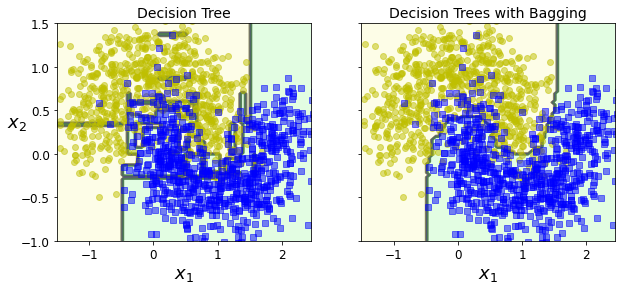

In [17]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
#save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

In [18]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

0.888

In [19]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9066666666666666

In [20]:
bag_clf.oob_decision_function_

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.19526627, 0.80473373],
       ...,
       [0.92      , 0.08      ],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, bootstrap_features=True, max_samples=0.2, max_features = 1.0, random_state=42)



bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  bootstrap_features=True, max_samples=0.2, n_estimators=500,
                  random_state=42)

0.9253333333333333


In [22]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                        random_state=42,
                                                        splitter='random'),
                  n_estimators=500, random_state=42)

0.9226666666666666


In [23]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

0.9333333333333333


In [24]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                        splitter='random'),
                  n_estimators=500, n_jobs=-1)

0.9253333333333333


In [25]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.976

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

RandomForestClassifier(n_estimators=500, random_state=42)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [27]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [38]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

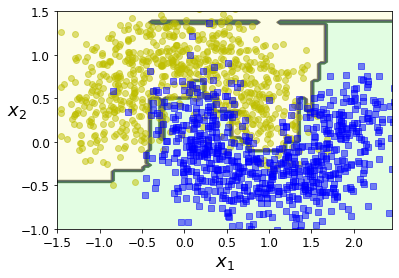

In [39]:
plot_decision_boundary(ada_clf, X, y)

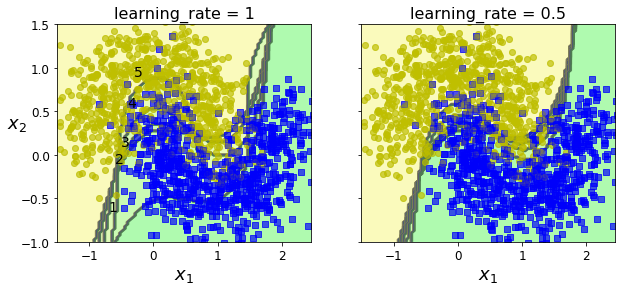

In [41]:
m = len(X_train)
from IPython.utils import io

with io.capture_output() as captured:
    fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
    for subplot, learning_rate in ((0, 1), (1, 0.5)):
        sample_weights = np.ones(m)
        plt.sca(axes[subplot])
        for i in range(5):
            svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
            svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
            y_pred = svm_clf.predict(X_train)
            sample_weights[y_pred != y_train] *= (1 + learning_rate)
            plot_decision_boundary(svm_clf, X, y, alpha=0.2)
            plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
        if subplot == 0:
            plt.text(-0.7, -0.65, "1", fontsize=14)
            plt.text(-0.6, -0.10, "2", fontsize=14)
            plt.text(-0.5,  0.10, "3", fontsize=14)
            plt.text(-0.4,  0.55, "4", fontsize=14)
            plt.text(-0.3,  0.90, "5", fontsize=14)
        else:
            plt.ylabel("")
plt.show()

In [42]:
list(m for m in dir(ada_clf) if not m.startswith("_") and m.endswith("_"))

['base_estimator_',
 'classes_',
 'estimator_errors_',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'n_classes_',
 'n_features_in_']

In [29]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=500, oob_score=True, random_state=40)

0.8906666666666667

In [30]:
bag_clf.oob_decision_function_

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.26704545, 0.73295455],
       ...,
       [0.89617486, 0.10382514],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [56]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [46]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [47]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [48]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [49]:
X_new = np.array([[0.8]])

In [51]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=20, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=20)

In [66]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

In [67]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

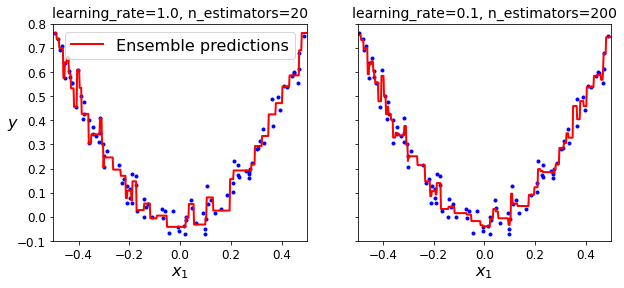

In [70]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

with io.capture_output() as captured:
    plt.sca(axes[0])
    plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
    plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$y$", fontsize=16, rotation=0)

    plt.sca(axes[1])
    plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
    plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
    plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

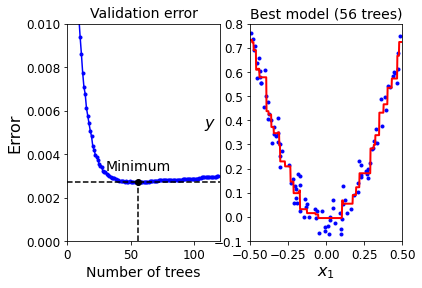

In [74]:
min_error = np.min(errors)

with io.capture_output() as captured:
    plt.subplot(121)
    plt.plot(errors, "b.-")
    plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
    plt.plot([0, 120], [min_error, min_error], "k--")
    plt.plot(bst_n_estimators, min_error, "ko")
    plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
    plt.axis([0, 120, 0, 0.01])
    plt.xlabel("Number of trees")
    plt.ylabel("Error", fontsize=16)
    plt.title("Validation error", fontsize=14)

    plt.subplot(122)
    plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
    plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
    plt.ylabel("$y$", fontsize=16, rotation=0)
    plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [84]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
with io.capture_output() as captured:
    for n_estimators in range(1, 120):
        gbrt.n_estimators = n_estimators
        gbrt.fit(X_train, y_train)
        y_pred = gbrt.predict(X_val)
        val_error = mean_squared_error(y_val, y_pred)
        if val_error < min_val_error:
            min_val_error = val_error
            error_going_up = 0
        else:
            error_going_up += 1
            if error_going_up == 5:
                break  # early stopping
print(gbrt.n_estimators)
print("Minimum validation MSE:", min_val_error)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=61, random_state=42)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_val)
mean_squared_error(y_val, y_pred)


gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_val)
mean_squared_error(y_val, y_pred)

61
Minimum validation MSE: 0.002712853325235463


GradientBoostingRegressor(max_depth=2, n_estimators=61, random_state=42)

0.002721390321329206

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

0.002712853325235463

In [88]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
xgb_reg.fit(X_train, y_train,
    eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.22834
Will train until validation_0-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:0.16224
[2]	validation_0-rmse:0.11843
[3]	validation_0-rmse:0.08760
[4]	validation_0-rmse:0.06848
[5]	validation_0-rmse:0.05709
[6]	validation_0-rmse:0.05297
[7]	validation_0-rmse:0.05129
[8]	validation_0-rmse:0.05155
[9]	validation_0-rmse:0.05211
[10]	validation_0-rmse:0.05338
Stopping. Best iteration:
[7]	validation_0-rmse:0.05129



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)